In [118]:
import pandas as pd
import numpy as np

# Park I - Read in the file

In [119]:
data=pd.read_excel(r'C:\Users\aleci\Documents\NLP\amazon_alexa.xls')

In [120]:
data.shape

(3150, 5)

In [121]:
data.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [122]:
data.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

In [123]:
data.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [124]:
data.describe(include='object')

,date,variation,verified_reviews
count,3150,3150,3150
unique,77,16,2301
top,30-Jul-18,Black Dot,
freq,1603,516,79


In [125]:
data['variation'].value_counts()

Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
White                            91
Sandstone Fabric                 90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: variation, dtype: int64

In [126]:
# check the length of reviews
data['length']=data['verified_reviews'].apply(len)

# Part 2 - Feature engineering
* Assign sentiment

In [127]:
from textblob import TextBlob

# find the sentiment of reviews
# Polarity: positive, negative or neutral, with +1 meaning positive sentiment, 0 for neutral, and -1 for negative sentiment
def get_polarity(text):
    textblob=TextBlob(str(text.encode('utf-8')))
    pol=textblob.sentiment.polarity
    return pol

data['polarity']=data['verified_reviews'].apply(get_polarity)

In [128]:
# subjectivity: 1 meaning very subjective, 0 meaning very objective
def get_polarity(text):
    textblob=TextBlob(str(text.encode('utf-8')))
    pol=textblob.sentiment.subjectivity
    return pol

data['subjectivity']=data['verified_reviews'].apply(get_polarity)

In [129]:
data[['length', 'polarity', 'subjectivity']].describe()

,length,polarity,subjectivity
count,3150.000000,3150.000000,3150.000000
mean,132.049524,0.349792,0.528922
std,182.099952,0.303362,0.256324
min,1.000000,-1.000000,0.000000
25%,30.000000,0.123852,0.419196
50%,74.000000,0.350000,0.585000
75%,165.000000,0.533333,0.695486
max,2851.000000,1.000000,1.000000


* generating features

In [130]:
data['char_count']=data['verified_reviews'].apply(len)

In [131]:
data['word_count']=data['verified_reviews'].apply(lambda x:len(x.split()))

In [132]:
data['word_density']=data['char_count']/(data['word_count']+1)

In [133]:
# importing the list of punctuations
import string
punctuation=string.punctuation

# punctuation count
data['punctuation_count']=data['verified_reviews'].apply(lambda x: len("".join(_ for _ in x if _ in punctuation)))

In [134]:
data[['char_count', 'word_count', 'word_density', 'punctuation_count']].describe()

,char_count,word_count,word_density,punctuation_count
count,3150.000000,3150.000000,3150.000000,3150.000000
mean,132.049524,25.293016,4.605345,3.887937
std,182.099952,34.584971,1.134737,5.762348
min,1.000000,0.000000,0.500000,0.000000
25%,30.000000,6.000000,4.269231,1.000000
50%,74.000000,14.000000,4.805665,2.000000
75%,165.000000,32.000000,5.207974,5.000000
max,2851.000000,526.000000,32.500000,121.000000


In [135]:
# Part of speech dictionary
pos_dic={
    'noun': ['NN', 'NNS', 'NNP', 'NNPS'],
    'pron': ['PRP', 'PRP$', 'WP', 'WP$'],
    'verb': ['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ'],
    'adj': ['JJ', 'JJR', 'JJS'],
    'adv': ['RB', 'RBR', 'RBS', 'WRB']
}

def pos_check(x, flag):
    cnt=0
    try:
        wiki=TextBlob(x)
        for tup in wiki.tags:
            ppo=list(tup)[1]
            if ppo in pos_dic[flag]:
                cnt+=1
                
    except:
        pass
    return cnt
        

In [136]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

data['noun_count']=data['verified_reviews'].apply(lambda x: pos_check(x, 'noun'))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aleci\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\aleci\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [137]:
data['verb_count']=data['verified_reviews'].apply(lambda x: pos_check(x, 'verb'))

In [138]:
data[['noun_count', 'verb_count']].describe()

,noun_count,verb_count
count,3150.000000,3150.000000
mean,5.945397,5.155873
std,8.222776,7.223565
min,0.000000,0.000000
25%,1.000000,1.000000
50%,3.000000,3.000000
75%,7.000000,7.000000
max,137.000000,102.000000


In [139]:
data['pron_count']=data['verified_reviews'].apply(lambda x: pos_check(x, 'pron'))
data['adj_count']=data['verified_reviews'].apply(lambda x: pos_check(x, 'adj'))
data['adv_count']=data['verified_reviews'].apply(lambda x: pos_check(x, 'adv'))

In [140]:
data[['pron_count', 'adj_count', 'adv_count']].describe()

,pron_count,adj_count,adv_count
count,3150.000000,3150.000000,3150.000000
mean,3.242222,2.172381,2.002540
std,4.627235,2.935390,3.277083
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,2.000000,1.000000,1.000000
75%,4.000000,3.000000,3.000000
max,70.000000,39.000000,54.000000


# Part 3 - Data Cleaning
* Remove the following:
    * punctuation
    * numbers
    * special and accented characters
    * stopwords
* Perform stemming and lemmatization

In [141]:
# remove punctuations
def punctuation_removal(messy_str):
    clean_list=[char for char in messy_str if char not in string.punctuation]
    clean_str=''.join(clean_list)
    return clean_str

data['verified_reviews']=data['verified_reviews'].apply(punctuation_removal)

In [142]:
# remove numbers
import re
def drop_numbers(list_text):
    list_text_new=[]
    for i in list_text:
        if not re.search('\d', i):
            list_text_new.append(i)
    return ''.join(list_text_new)

data['verified_reviews']=data['verified_reviews'].apply(drop_numbers)

In [143]:
data['verified_reviews'].head(10)

0                                         Love my Echo
1                                             Loved it
2    Sometimes while playing a game you can answer ...
3    I have had a lot of fun with this thing My  yr...
4                                                Music
5    I received the echo as a gift I needed another...
6    Without having a cellphone I cannot use many o...
7    I think this is the th one Ive purchased Im wo...
8                                          looks great
9    Love it I’ve listened to songs I haven’t heard...
Name: verified_reviews, dtype: object

In [144]:
# tokenization: separate texts into tokens (works, characters or sentences)
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize

In [145]:
sentence_data="The First sentence is about Python.  The Second: about Django.  You can learn Python, \
Django and Data Analysis here."

nltk_tokens=nltk.sent_tokenize(sentence_data)
print(nltk_tokens)

['The First sentence is about Python.', 'The Second: about Django.', 'You can learn Python, Django and Data Analysis here.']


In [146]:
# tokenize German language
german_tokenizer=nltk.data.load("tokenizers/punkt/german.pickle")

german_tokens=german_tokenizer.tokenize("wie geht es Ihnen? Gut, danke.")
print(german_tokens)

['wie geht es Ihnen?', 'Gut, danke.']


In [147]:
word_data="It originated from the idea that there are readers who prefer learning new \
skills from the comforts of their drawing room"

nltk_tokens=nltk.word_tokenize(word_data)
print(nltk_tokens)

['It', 'originated', 'from', 'the', 'idea', 'that', 'there', 'are', 'readers', 'who', 'prefer', 'learning', 'new', 'skills', 'from', 'the', 'comforts', 'of', 'their', 'drawing', 'room']


In [148]:
# remove special or accented characters
import unicodedata
    
def remove_accented_chars(text):
    new_text=unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return new_text

data['verified_reviews']=data.apply(lambda x: remove_accented_chars(x['verified_reviews']), axis=1)

In [149]:
# remove special characters
def remove_special_characters(text):
    pat=r'[^a-zA-z0-9]'
    return re.sub(pat, ' ', text)

data['verified_reviews']=data.apply(lambda x: remove_special_characters(x['verified_reviews']), axis=1)

In [150]:
data['verified_reviews'][:5]

0                                         Love my Echo
1                                             Loved it
2    Sometimes while playing a game you can answer ...
3    I have had a lot of fun with this thing My  yr...
4                                                Music
Name: verified_reviews, dtype: object

In [151]:
# remove stopwords: the, and, myself, this, into, here...
# Spacy, NLTK and Gensim can be used to remove stopwords

import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

import re

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aleci\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [152]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [153]:
text='Nick likes to play football, however he is not too fond of tennis.'
text_tokens=word_tokenize(text)

tokens_without_sw=[word for word in text_tokens if not word in stopwords.words()]
print(tokens_without_sw)

['Nick', 'likes', 'play', 'football', ',', 'fond', 'tennis', '.']


In [154]:
# remove stopwords by using gensim library
from gensim.parsing.preprocessing import remove_stopwords

text='Nick likes to play football, however he is not too fond of tennis.'
filtered_sentence=remove_stopwords(text)
print(filtered_sentence)

Nick likes play football, fond tennis.


* stemming and lemmatization

In [155]:
# stemming: reduce a work to its stem
# lemmatization: good better lemmatized to good. in stemming, better might be chopped off to bet

# for stemming
import nltk

# for lammatization
# need to run python -m spacy download en_core_web_sm in annoconda cmd first
import spacy
#nlp=spacy.load('en_core_web_sm', parse=True, tag=True, entity=True)
nlp = spacy.load("en_core_web_sm")

In [156]:
def get_stem(text):
    stemmer=nltk.porter.PorterStemmer()
    text=' '.join([stemmer.stem(word) for word in text.split()])
    return text

get_stem("we are eating and swimming; we have been eating and swimming; he eats and swims; he ate and swam")

'we are eat and swimming; we have been eat and swimming; he eat and swims; he ate and swam'

In [157]:
def get_lem(text):
    text=nlp(text)
    text=' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in text])
    return text

get_lem("we are eating and swimming; we have been eating and swimming; he eats and swims; he ate and swam")

'we be eat and swimming ; we have be eat and swimming ; he eat and swim ; he eat and swam'

# Part 4 - Feature Extraction
* bag of words
* TF-IDF
* N-grams

In [158]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aleci\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [159]:
# clean the data
corpus=[]

for i in range(0, 3150):
    review=re.sub('[^a-zA-Z]', ' ', data['verified_reviews'][i])   ## remove all uncessary items
    review=review.lower()
    review=review.split()
    ps=PorterStemmer()
    review=[ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review=' '.join(review)
    corpus.append(review)

In [160]:
# create bag of words
from sklearn.feature_extraction.text import CountVectorizer

cv=CountVectorizer(max_features=2500)

x=cv.fit_transform(corpus).toarray()
y=data.iloc[:, 4].values

print(x.shape)
print(y.shape)

(3150, 2500)
(3150,)


In [161]:
# using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

tf=TfidfVectorizer(max_features=2500)

x=tf.fit_transform(corpus).toarray()
y=data.iloc[:, 4].values

print(x.shape)
print(y.shape)

(3150, 2500)
(3150,)


In [162]:
# create bag of words with n-grams
from sklearn.feature_extraction.text import CountVectorizer

cv=CountVectorizer(max_features=2500, ngram_range=(2, 2))  # to use trigrams ngram_range=(3, 3)

x=cv.fit_transform(corpus).toarray()
y=data.iloc[:, 4].values

print(x.shape)
print(y.shape)

(3150, 2500)
(3150,)


In [163]:
# TF-IDF with n-grams
from sklearn.feature_extraction.text import TfidfVectorizer

tf=TfidfVectorizer(max_features=2500, ngram_range=(2, 2))

x=tf.fit_transform(corpus).toarray()
y=data.iloc[:, 4].values

print(x.shape)
print(y.shape)

(3150, 2500)
(3150,)


# Part 5 - Data Visualization

In [164]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\aleci\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\aleci\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


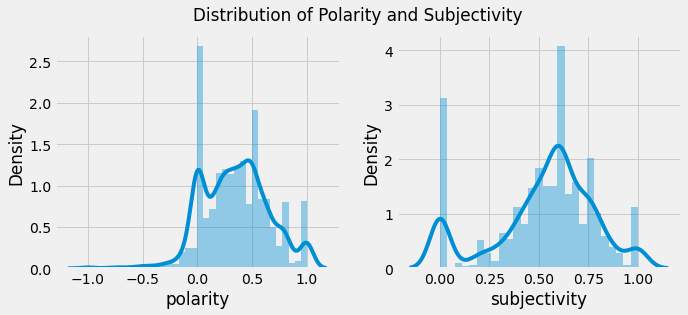

In [165]:
plt.rcParams['figure.figsize']=(10, 4)

plt.subplot(1, 2, 1)
sns.distplot(data['polarity'])

plt.subplot(1, 2, 2)
sns.distplot(data['subjectivity'])

plt.suptitle('Distribution of Polarity and Subjectivity')
plt.show()

C:\Users\aleci\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


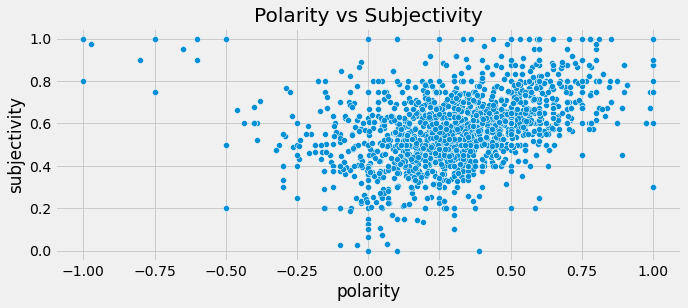

In [166]:
sns.scatterplot(data['polarity'], data['subjectivity'])
plt.title('Polarity vs Subjectivity')
plt.show()

In [167]:
# part-of-speech tagging

import pandas as pd
import spacy

nlp=spacy.load("en_core_web_sm")


# an example for processing whole documents
text=("""My name is Shaurya Uppal. 
I enjoy writing articles on GeeksforGeeks checkout
my other articles by going to my profile section.""")

doc=nlp(text)

# token and tag
for token in doc: 
    print(token, token.pos_)

# I want a list of verb tokens
print("Verbs:", [token.text for token in doc if token.pos_=='VERB'])

My PRON
name NOUN
is AUX
Shaurya PROPN
Uppal PROPN
. PUNCT

 SPACE
I PRON
enjoy VERB
writing VERB
articles NOUN
on ADP
GeeksforGeeks PROPN
checkout NOUN

 SPACE
my PRON
other ADJ
articles NOUN
by ADP
going VERB
to ADP
my PRON
profile NOUN
section NOUN
. PUNCT
Verbs: ['enjoy', 'writing', 'going']


In [168]:
# name entity recognition
doc=nlp("Apple is looking at buying U.K. startup for $1 billion")

for ent in doc.ents: 
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

Apple 0 5 ORG
U.K. 27 31 GPE
$1 billion 44 54 MONEY


In [169]:
# using displacy
from spacy import displacy

doc=nlp(data['verified_reviews'][0])
displacy.serve(doc, style='dep')

C:\Users\aleci\anaconda3\lib\site-packages\spacy\displacy\__init__.py:103: UserWarning: [W011] It looks like you're calling displacy.serve from within a Jupyter notebook or a similar environment. This likely means you're already running a local web server, so there's no need to make displaCy start another one. Instead, you should be able to replace displacy.serve with displacy.render to show the visualization.
  warnings.warn(Warnings.W011)



Using the 'dep' visualizer
Serving on http://0.0.0.0:5000 ...

Shutting down server on port 5000.


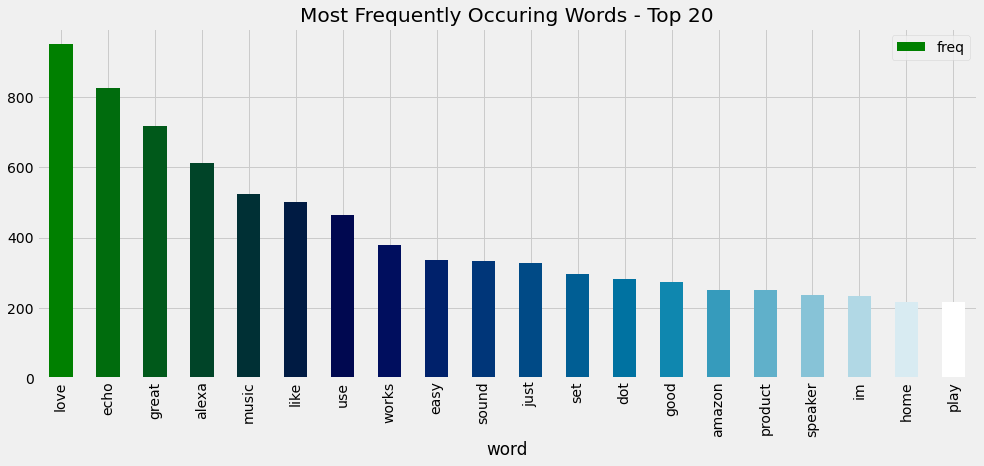

In [173]:
# visualize the most frequent words
# This step will take a bit long time to run, so we analyze a subset only

import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

# select the first 3 rows of review to analyze
#data_subset=data.loc[0:100]

cv=CountVectorizer(stop_words='english')
words=cv.fit_transform(data.verified_reviews)
sum_words=words.sum(axis=0)

words_freq=[(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq, key=lambda x: x[1], reverse=True)
frequency=pd.DataFrame(words_freq, columns=['word', 'freq'])

plt.style.use('fivethirtyeight')
color=plt.cm.ocean(np.linspace(0, 1, 20))
frequency.head(20).plot(x='word', y='freq', kind='bar', figsize=(15, 6), color=color)
plt.title("Most Frequently Occuring Words - Top 20")
plt.show()

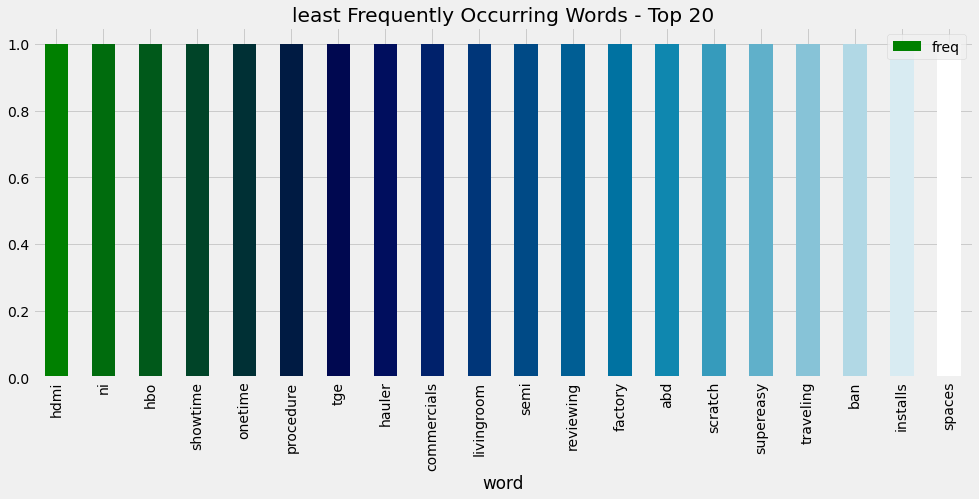

In [175]:
# visualize least frquent words 
from sklearn.feature_extraction.text import CountVectorizer

cv=CountVectorizer(stop_words='english')
words=cv.fit_transform(data.verified_reviews)
sum_words=words.sum(axis=0)

words_freq=[(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq, key=lambda x: x[1], reverse=True)
frequency=pd.DataFrame(words_freq, columns=['word', 'freq'])

plt.style.use('fivethirtyeight')
color=plt.cm.ocean(np.linspace(0, 1, 20))
frequency.tail(20).plot(x='word', y='freq', kind='bar', figsize=(15, 6), color=color)
plt.title("least Frequently Occurring Words - Top 20")
plt.show()

In [176]:
# visualize N-grams
import nltk
import collections

# function for making ngrams
from nltk.util import ngrams

# for reading the dataset
import pandas as pd

In [177]:
text=str(data['verified_reviews'])
tokenized=text.split()

# get a list of all bi-grams
esBigrams=ngrams(tokenized, 2)

# get the frequency of each bigram in our corpus
esBigramFreq=collections.Counter(esBigrams)

# 10 most popular bi-grams
esBigramFreq.most_common(10)

[(('I', 'have'), 2),
 (('0', 'Love'), 1),
 (('Love', 'my'), 1),
 (('my', 'Echo'), 1),
 (('Echo', '1'), 1),
 (('1', 'Loved'), 1),
 (('Loved', 'it'), 1),
 (('it', '2'), 1),
 (('2', 'Sometimes'), 1),
 (('Sometimes', 'while'), 1)]

In [179]:
# visualize tri-grams
# get a list of all tri-grams
esTrigrams=ngrams(tokenized, 3)

# get the frequency of each bigram in our corpus
esTrigramFreq=collections.Counter(esTrigrams)

# 10 most popular bi-grams
esTrigramFreq.most_common(10)

[(('0', 'Love', 'my'), 1),
 (('Love', 'my', 'Echo'), 1),
 (('my', 'Echo', '1'), 1),
 (('Echo', '1', 'Loved'), 1),
 (('1', 'Loved', 'it'), 1),
 (('Loved', 'it', '2'), 1),
 (('it', '2', 'Sometimes'), 1),
 (('2', 'Sometimes', 'while'), 1),
 (('Sometimes', 'while', 'playing'), 1),
 (('while', 'playing', 'a'), 1)]

* install library wordcloud for the following analysis

In [180]:
#!pip install wordcloud

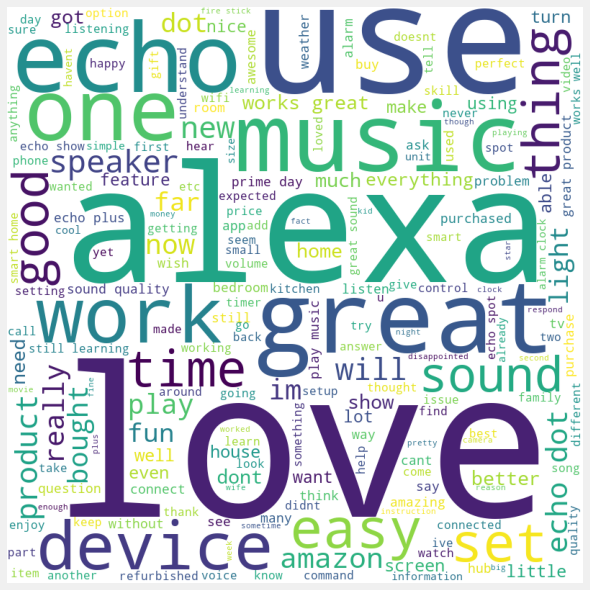

In [201]:
from wordcloud import WordCloud, STOPWORDS

words_freq = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in data.verified_reviews:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    words_freq += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stopwords,
                      min_font_size = 10).generate(words_freq)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

# Part 6 - Text Classification

In [202]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aleci\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [203]:
corpus=[]

for i in range(0, 3150):
    review=re.sub('[^a-zA-Z]', ' ', data['verified_reviews'][i])
    review=review.lower()
    review=review.split()
    ps=PorterStemmer()
    review=[ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review=' '.join(review)
    corpus.append(review)

In [205]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf=TfidfVectorizer(max_features=2500)
x=tf.fit_transform(corpus).toarray()
y=data.iloc[:, 4].values

print(x.shape)
print(y.shape)

(3150, 2500)
(3150,)


In [207]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.3, random_state=15)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2205, 2500)
(2205,)
(945, 2500)
(945,)


In [208]:
from sklearn.naive_bayes import GaussianNB

model=GaussianNB()
model.fit(x_train, y_train)

y_pred=model.predict(x_test)

print("Training Accuracy:", model.score(x_train, y_train))
print("Testing Accuracy:", model.score(x_test, y_test))

Training Accuracy: 0.6444444444444445
Testing Accuracy: 0.5936507936507937


In [210]:
# SVM model
from sklearn.svm import SVC

model=SVC()
model.fit(x_train, y_train)

y_pred=model.predict(x_test)

print("Training Accuracy:", model.score(x_train, y_train))
print("Testing Accuracy:", model.score(x_test, y_test))

Training Accuracy: 0.982766439909297
Testing Accuracy: 0.9322751322751323


# Part 7 - Sentiment Analysis
* install needed libaries first
* Tweepy is a python library for accessing the Twitter API.

In [214]:
#!pip install pathlib
#!pip install ruamel-yaml
#!pip install tweepy

In [215]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [246]:
data=pd.read_excel(r'C:\Users\aleci\Documents\NLP\amazon_alexa.xls')

In [247]:
def clean_data(text):
    return ' '.join(re.sub("(@[a-zA-Z0-9]+)|([^0-9A-Za-z])|(http://[\w.]+/[\w]+)", " ", text).split())

data['cleaned_reviews']=data['verified_reviews'].apply(clean_data)

In [248]:
data.head()

,rating,date,variation,verified_reviews,feedback,cleaned_reviews
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,Love my Echo
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,Loved it
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,Sometimes while playing a game you can answer ...
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,I have had a lot of fun with this thing My 4 y...
4,5,31-Jul-18,Charcoal Fabric,Music,1,Music


In [249]:
def drop_numbers(list_text):
    list_text_new=[]
    for i in list_text:
        if not re.search('\d', i):
            list_text_new.append(i)
    return ''.join(list_text_new)

data['cleaned_reviews']=data['cleaned_reviews'].apply(drop_numbers)

In [250]:
data.head()

,rating,date,variation,verified_reviews,feedback,cleaned_reviews
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,Love my Echo
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,Loved it
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,Sometimes while playing a game you can answer ...
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,I have had a lot of fun with this thing My yr...
4,5,31-Jul-18,Charcoal Fabric,Music,1,Music


In [251]:
# change all to lower case
def lower_case(text):
    text_words=word_tokenize(text)
    text_words_lower=[x.lower() for x in text_words]
    return ' '.join(text_words_lower)

data['cleaned_reviews']=data['cleaned_reviews'].apply(lower_case)

In [252]:
data.head()

,rating,date,variation,verified_reviews,feedback,cleaned_reviews
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,love my echo
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,loved it
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,sometimes while playing a game you can answer ...
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,i have had a lot of fun with this thing my yr ...
4,5,31-Jul-18,Charcoal Fabric,Music,1,music


In [253]:
# lemmatization
import nltk
nltk.download('wordnet')

lemmatizer=WordNetLemmatizer()

def lemmatise(text):
    text_tokens=word_tokenize(text)
    text_lemm=[lemmatizer.lemmatize(word) for word in text_tokens]
    return ' '.join(text_lemm)

data['cleaned_reviews']=data['cleaned_reviews'].apply(lemmatise)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\aleci\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [254]:
data['cleaned_reviews'].values

array(['love my echo', 'loved it',
       'sometimes while playing a game you can answer a question correctly but alexa say you got it wrong and answer the same a you i like being able to turn light on and off while away from home',
       ...,
       'i do love these thing i have them running my entire home tv all my light my thermostat my front door dead bolt the camera and i love listening to npr these thing are well worth the value and they really shine once you stat adding smart device and you can control your entire home like it right out of star trek i named mine computer to get the feel but it amazing what you can do with these device and smart system',
       'only complaint i have is that the sound quality isn t great i mostly use it for command though and i have another dot hooked up to my stereo system to play music through i have a couple friend that have a dot and don t mind the audio quality but if you re bothered by that kind of thing i d go with the full size echo or m

In [255]:
# remove stopwords
def remove_stopwords(text):
    text_tokens=word_tokenize(text)
    tokens=[word for word in text_tokens if not word in set(stopwords.words('english'))]
    tokens_text=' '.join(tokens)
    return tokens_text

data['cleaned_reviews']=data['cleaned_reviews'].apply(remove_stopwords)

In [260]:
data.head()

,rating,date,variation,verified_reviews,feedback,cleaned_reviews,polarity
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,love echo,"""Positive"
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,loved,Strongly Positive
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,sometimes playing game answer question correct...,Neutral
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,lot fun thing yr old learns dinosaur control l...,Weakly Positive
4,5,31-Jul-18,Charcoal Fabric,Music,1,music,Neutral


In [261]:
data['cleaned_reviews'].values

array(['love echo', 'loved',
       'sometimes playing game answer question correctly alexa say got wrong answer like able turn light away home',
       ...,
       'love thing running entire home tv light thermostat front door dead bolt camera love listening npr thing well worth value really shine stat adding smart device control entire home like right star trek named mine computer get feel amazing device smart system',
       'complaint sound quality great mostly use command though another dot hooked stereo system play music couple friend dot mind audio quality bothered kind thing go full size echo make sure hook larger speaker',
       'good'], dtype=object)

In [262]:
def get_polarity(text):
    textblob=TextBlob(str(text))
    pol=textblob.sentiment.polarity
    if(pol==0):
        return 'Neutral'
    elif(pol>0 and pol<=0.3):
        return 'Weakly Positive'
    elif(pol>0.3 and pol<=0.6): 
        return '"Positive'
    elif(pol>0.6 and pol<=1):
        return "Strongly Positive"
    elif(pol>-0.3 and pol<=0):
        return 'Weakly Negative'
    elif(pol>-0.6 and pol<=-0.3):
        return "Negative"
    elif(pol>-1 and pol<=-0.6):
        return 'Strongly Negative'
    
data['polarity']=data['cleaned_reviews'].apply(get_polarity)

In [263]:
data['polarity'].value_counts()

"Positive            1294
Weakly Positive       760
Strongly Positive     497
Neutral               425
Weakly Negative       131
Negative               30
Strongly Negative      11
Name: polarity, dtype: int64

In [258]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
 5   cleaned_reviews   3150 non-null   object
dtypes: int64(2), object(4)
memory usage: 147.8+ KB


In [271]:
neutral=0
wpositive=0
spositive=0
positive=0
negative=0
wnegative=0
snegative=0
polarity=0

for i in range(0, 3150):
    textblob=TextBlob(str(data['cleaned_reviews'][i]))
    polarity+=textblob.sentiment.polarity
    pol=textblob.sentiment.polarity
    if (pol==0): # adding reaction of how people are reacting to find
        neutral+=1
    elif (pol > 0 and pol <= 0.3):
        wpositive +=1
    elif (pol > 0.3 and pol <= 0.6):
        positive +=1
    elif (pol > 0.6 and pol <= 1):
        spositive+=1
    elif (pol > -0.3 and pol <= 0):
        wnegative += 1
    elif (pol > -0.6 and pol <= -0.3):
        negative +=1 
    elif (pol > -1 and pol <=-0.6):
        snegative +=1

In [272]:
# averge reaction
polarity=polarity/len(data['cleaned_reviews'])
polarity

0.3401034727406135

In [268]:
polarity

1071.3259391329325

In [275]:
def percentage(part, whole):
    temp=100*float(part)/float(whole)
    return format(temp, '.2f')

In [276]:
# finding avrage of how people are reacting
NoOfTerms=len(data['cleaned_reviews'])
positive=percentage(positive, NoOfTerms)
wpositive=percentage(wpositive, NoOfTerms)
spositive=percentage(spositive, NoOfTerms)
negative=percentage(negative, NoOfTerms)
wnegative=percentage(wnegative, NoOfTerms)
snegative=percentage(snegative, NoOfTerms)
neutral=percentage(neutral, NoOfTerms)

In [278]:
# print out the data
print("How people are reacting on Amazon Echo by analyzing "+str(NoOfTerms)+" reviews.")
print()
print("------------------------------------------------------------------")
print()
print("General Report: ")

if (polarity==0):
    print("Neutral")
elif (polarity > 0 and polarity <= 0.3):
    print("Weakly Positive")
elif (polarity > 0.3 and polarity <= 0.6):
    print("Positive")
elif (polarity > 0.6 and polarity <= 1):
    print('Strongly Positive')
elif (polarity > -0.3 and polarity <=0):
    print('Weakly Negative')
elif (polarity > -0.6 and poalrity <= -0.3):
    print("Negative")
elif (polarity > -1 and polarity <= -0.6):
    print("Strongly Negative")
    
print()
print("----------------------------------------------------------------")
print()
print("Detailed Report: ")
print(str(positive)+"% people thought it was positive")
print(str(wpositive)+"% people thought it was weakly positive")
print(str(spositive)+"% people thought it was strongly positive")
print(str(negative)+"% people thought it was negative")
print(str(wnegative)+"% people thought it was weakly negative")
print(str(snegative)+"% people thought it was strongly negative")
print(str(neutral)+"% people thought it was neutral")

How people are reacting on Amazon Echo by analyzing 3150 reviews.

------------------------------------------------------------------

General Report: 
Positive

----------------------------------------------------------------

Detailed Report: 
41.08% people thought it was positive
24.13% people thought it was weakly positive
15.78% people thought it was strongly positive
0.95% people thought it was negative
4.16% people thought it was weakly negative
0.35% people thought it was strongly negative
13.49% people thought it was neutral


In [279]:
sizes=[positive, wpositive, spositive, neutral, negative, wnegative, snegative]
colors=['yellowgreen', 'lightgreen', 'darkgreen', 'gold', 'red', 'lightsalmon', 'darkred']
labels=['Positive['+str(positive)+'%]', 'Weakly Positive['+str(positive)+'%]', 'Strongly Positive['+str(spositive)+'%]', 
        'Neutral['+str(neutral)+'%]', 'Negative['+str(negative)+'%]', 'Weakly Negative['+str(wnegative)+'%]', 
        'Strongly Negative['+str(snegative)+'%]']

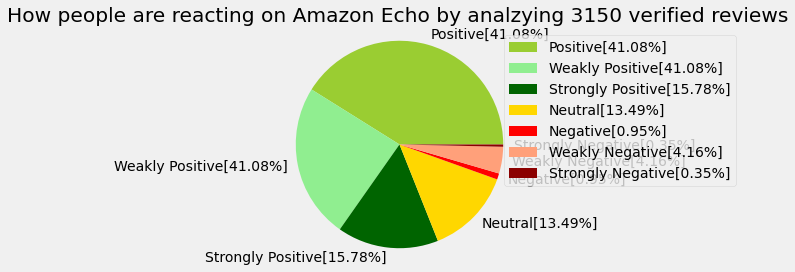

In [284]:
plt.pie(sizes, labels=labels, colors=colors)
plt.legend(labels, loc='best')
plt.title("How people are reacting on Amazon Echo by analzying "+str(NoOfTerms)+" verified reviews")
plt.axis('equal')
plt.tight_layout()
plt.show()

### Summary

This project performs sentiment analysis on Amazon Echo user reviews to assess customer satisfaction and product perception. By applying Natural Language Processing (NLP) and machine learning techniques, reviews were categorized into sentiment levels from strongly negative to strongly positive. The Support Vector Machine (SVM) model achieved high accuracy at 93.23%, effectively identifying patterns in customer feedback.

The analysis shows that the majority of reviews are positive, reflecting strong customer approval of Amazon Echo, while a smaller portion of neutral or negative reviews highlights areas for potential improvement. These insights provide Amazon with a data-driven understanding of customer sentiments, guiding strategies for product enhancement and customer satisfaction.